## Car price prediction

In [1]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
# Supress warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [3]:
df= pd.read_csv(r"C:\Users\asus\Desktop\Alpha Code\car data.csv")

In [6]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [5]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Data Cleaning

In [8]:
df.columns = df.columns.str.lower()
# Checking for missing values
df.isnull().sum().any()

np.False_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_kms     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# Data type conversion
obj_col = df.select_dtypes(['object']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [11]:
for col in list(obj_col):
  print(f'{col} = > {len(df[col].unique())}')
  print()

car_name = > 98

fuel_type = > 3

selling_type = > 2

transmission = > 2



In [12]:
# Label encoding
le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['selling_type'] = le.fit_transform(df['selling_type'])
df['transmission'] = le.fit_transform(df['transmission'])

In [13]:
df.drop('car_name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           301 non-null    int64  
 1   selling_price  301 non-null    float64
 2   present_price  301 non-null    float64
 3   driven_kms     301 non-null    int64  
 4   fuel_type      301 non-null    int64  
 5   selling_type   301 non-null    int64  
 6   transmission   301 non-null    int64  
 7   owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [14]:
df.describe()

,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


#### Data Preprocessing (EDA and Transformation)

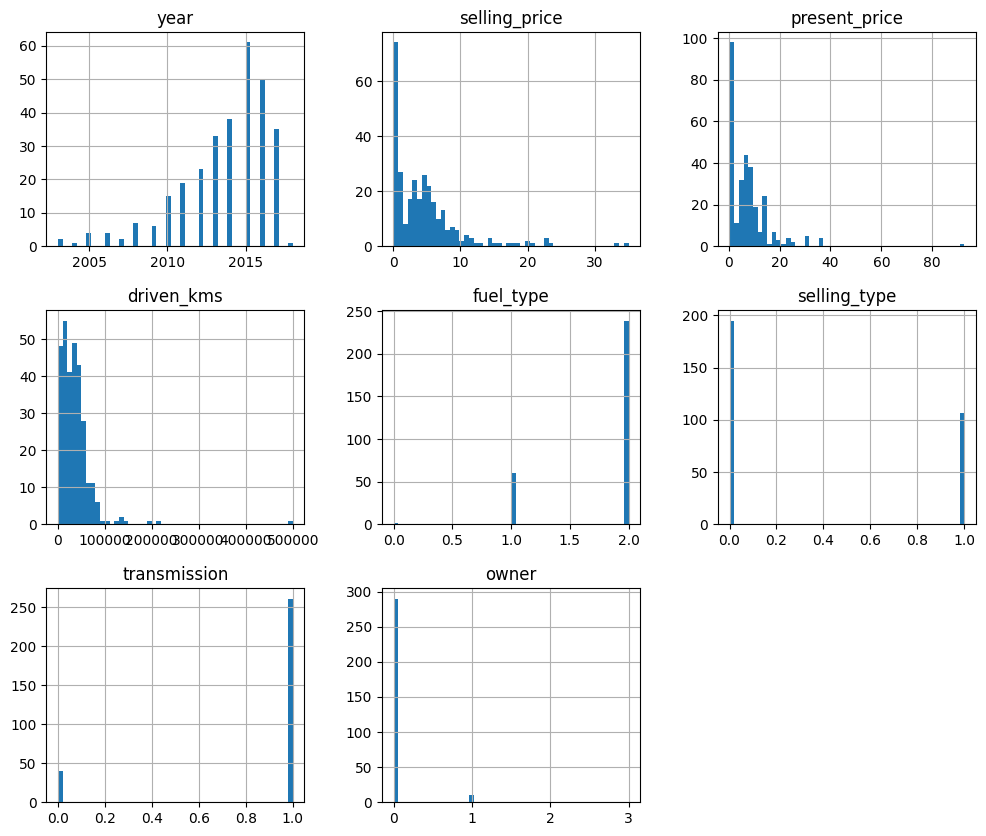

In [15]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [16]:
# Adjusting all the features values to small range
df['driven_kms'] = np.log(df['driven_kms'])
df['selling_price'] = np.log(df['selling_price'])
df['present_price'] = np.log(df['present_price'])

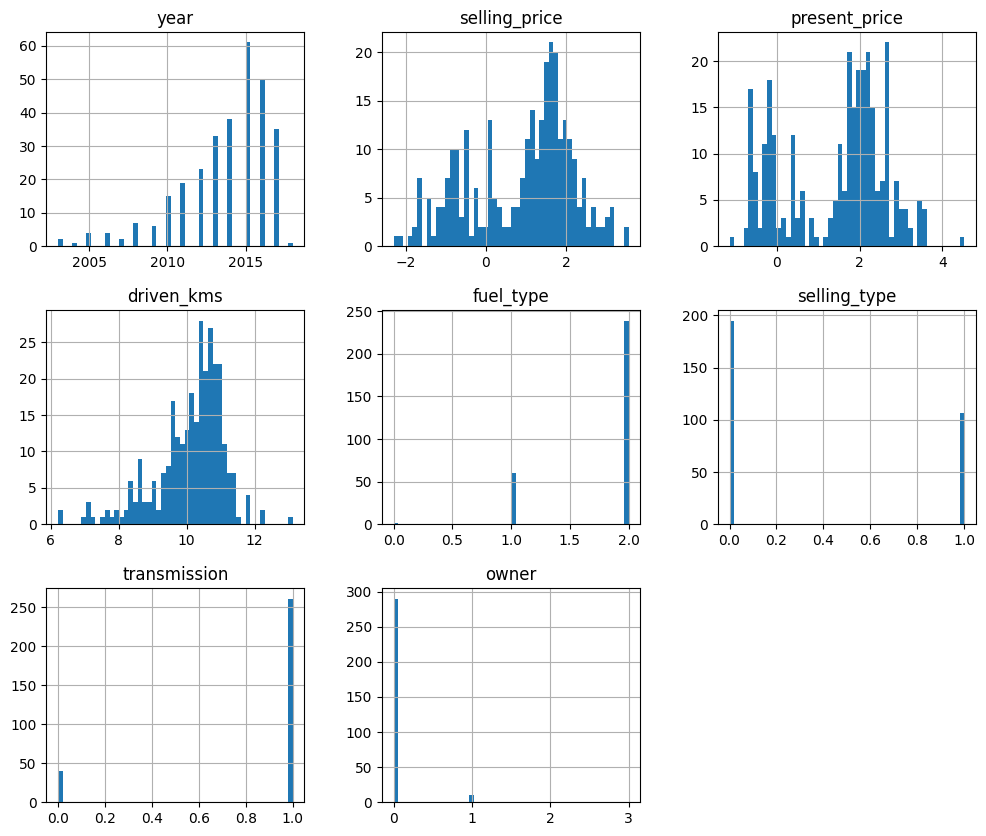

In [17]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

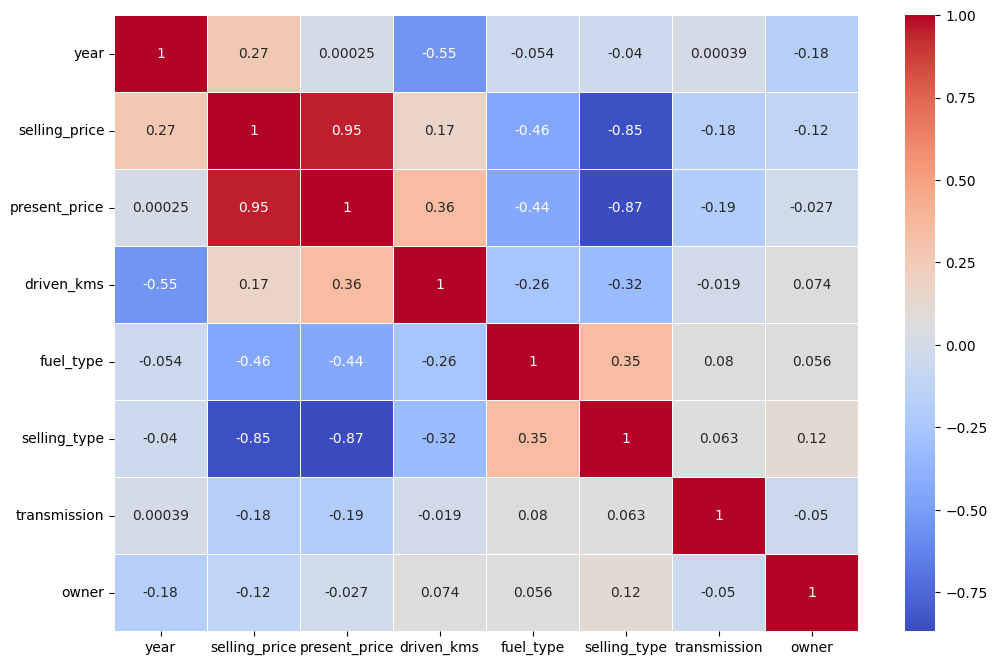

In [18]:
# Heatmap to check correlations
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

#### Feature Selection

In [19]:
x = df.drop('selling_price', axis = 1)
y = df.selling_price

x, y = shuffle(x, y, random_state=42)

In [20]:
# Initiating Model
model_sfs = RandomForestRegressor(random_state = 42)

In [21]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [22]:
# Fitting Model
sfs.fit(x,y)


[2025-07-27 21:07:09] Features: 1/7 -- score: -0.4029621579500101
[2025-07-27 21:07:27] Features: 2/7 -- score: -0.23132080497669633
[2025-07-27 21:07:52] Features: 3/7 -- score: -0.2226129039458063
[2025-07-27 21:08:16] Features: 4/7 -- score: -0.21792721688462327
[2025-07-27 21:08:42] Features: 5/7 -- score: -0.21597189207329767
[2025-07-27 21:09:10] Features: 6/7 -- score: -0.21465112578404044
[2025-07-27 21:09:33] Features: 7/7 -- score: -0.21546185526341008

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 7),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [23]:
list(sfs.k_feature_names_)

['year', 'present_price', 'driven_kms', 'fuel_type', 'selling_type', 'owner']

In [24]:
x = df[list(sfs.k_feature_names_)]
y = df.selling_price

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)


#### Modelling

In [28]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [29]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [30]:
model_r.fit(xtest,ytest)

RandomForestRegressor()

#### Model Evaluation

In [31]:
# Linear Regression
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.03909336133565791
Root Mean Squared Error (RMSE): 0.19772041203592994
Mean Absolute Error (MAE): 0.1420172934729849
R-squared (R2): 0.9726806309248427
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [32]:
# RandomForestRegressor
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.008576981681236379
Root Mean Squared Error (RMSE): 0.09261199534205264
Mean Absolute Error (MAE): 0.06698532541949286
R-squared (R2): 0.9940062015622373
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


#### Cross Validation

In [33]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')

Mean MSE: 0.05387590807273329
Standard Deviation of MSE: 0.016258983585796152
Mean RMSE: 0.22937186786952052
Standard Deviation of RMSE: 0.035559166227296615
Mean MAE: 0.16043786649316655
Standard Deviation of MAE: 0.024194086613747754
Mean R-squared: 0.9676123279241249
Standard Deviation of R-squared: 0.007361485703403141



Test Set MSE: 0.038482468970543054
Test Set RMSE: 0.19616949041719778
Test Set MAE: 0.14834366115969144
Test Set R-squared: 0.9731075370136918


## Conclusion

##### Cross-Validation Metrics (Training Data):


Mean MSE: 0.0537
Mean RMSE: 0.2290
Mean MAE: 0.1602
Mean R-squared: 0.9677
These metrics indicate that the model fits the training data very well:



Mean MSE (0.0537) suggests that, on average, the squared differences between predicted and actual values are low, indicating accurate predictions.
Mean RMSE (0.2290) is relatively low, showing that predictions are close to the actual values in terms of the target variable's scale.
Mean MAE (0.1602) indicates that the average absolute difference between predicted and actual values is small.
Mean R-squared (0.9677) means the model explains approximately 96.77% of the variance in the target variable, demonstrating a strong fit to the data.
Test Set Metrics:
Test Set MSE: 0.0383
Test Set RMSE: 0.1958
Test Set MAE: 0.1480
Test Set R-squared: 0.9732
The metrics on the test set confirm the model’s excellent performance:

Test Set MSE (0.0383) is lower than the training set MSE, suggesting good generalization to unseen data.
Test Set RMSE (0.1958) is low, indicating that predictions on the test set are also close to the actual values.
Test Set MAE (0.1480) shows that the average absolute difference between predicted and actual values is small in the test set.
Test Set R-squared (0.9732) implies that the model explains approximately 97.32% of the variance in the test set, reinforcing its strong predictive capability.

#### Summary:

The model demonstrates exceptional performance across both cross-validation on the training data and evaluation on the test set. It achieves low error metrics (MSE, RMSE, MAE) and high R-squared values consistently, indicating precise predictions and a robust fit to the data. The low variance in performance metrics between training and test sets suggests that the model generalizes well to new data, making it a reliable and effective tool for predicting the target variable.